In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
####    The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
####   This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 

#### bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
####      bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv. to test more computationally demanding machine learning algorithm.
 


In [2]:
#import the train dataset
df = pd.read_csv("C:/Users/Co/Desktop/python analysis/Convulated_Neural_Network/bank-additional/bank-additional-full.csv", 
                 header=0, sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
#Import the test dataset
df_test = pd.read_csv("C:/Users/Co/Desktop/python analysis/Convulated_Neural_Network/bank-additional/bank-additional.csv", 
                 header=0, sep=';')

In [5]:
df_test 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [6]:
#append both dataset
combine_train_test_df = df.append(df_test)
combine_train_test_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [7]:
# replace unknown values in the combined dataset with null values
combine_train_test_df.replace('unknown', np.nan, inplace=True)
combine_train_test_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [8]:
combine_train_test_df.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


## Feature Extraction and Visualization

### Train Dataset

In [9]:
df = combine_train_test_df.iloc[:41188, :]
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
# sns.heatmap(df.corr(), annot=True)
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

## Bank Client Data

#### Age

In [15]:
print(df['age'].max())
print(df['age'].min())

98
17


In [16]:
df_age = df[['age', 'y']]
df_age
bins = np.arange(10, 110, 10)
age_grade = df_age.groupby(pd.cut(df_age['age'], bins)).count()
print(age_grade)

             age      y
age                    
(10, 20]     140    140
(20, 30]    7243   7243
(30, 40]   16385  16385
(40, 50]   10240  10240
(50, 60]    6270   6270
(60, 70]     488    488
(70, 80]     303    303
(80, 90]     109    109
(90, 100]     10     10


The highest age grade of the bank clients is mostly between the age of 30 and 40


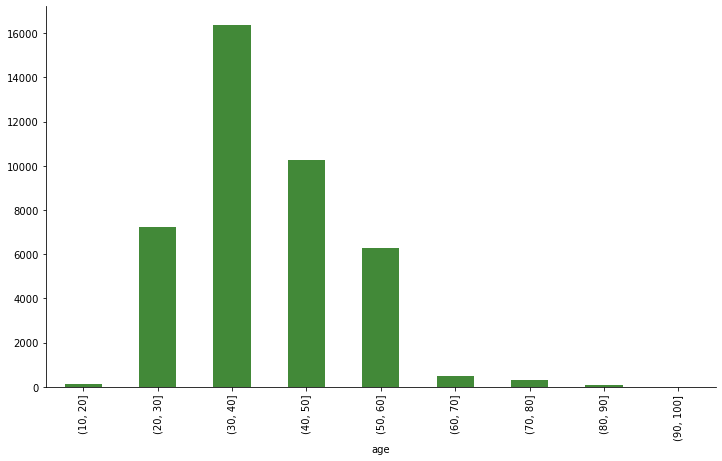

In [17]:
plt.figure(figsize=(12,7))
age_grade['age'].plot(kind='bar', color= '#428938')
sns.despine()

print('The highest age grade of the bank clients is mostly between the age of 30 and 40' )

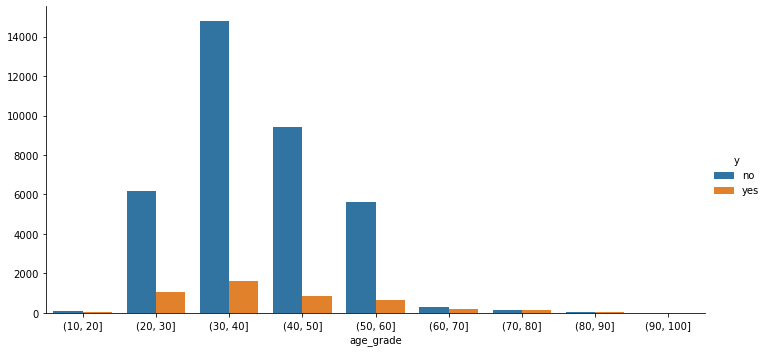

In [18]:
df_age = df[['age', 'y']]
df_age
bins = np.arange(10, 110, 10)
age_grade = pd.cut(df['age'], bins).to_frame()
age_grade

#rename the 'age' column to 'age_grade' coulumn
age_grade.rename(columns={'age':'age_grade'}, inplace=True)
age_grade

age_g_vs_deposit = age_grade.join(df_age)
age_g_vs_deposit


sns.catplot(x='age_grade', kind='count', hue='y', data=age_g_vs_deposit, height=5, aspect=2)
plt.ylabel('')
plt.show()

#### Employment Details

In [19]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


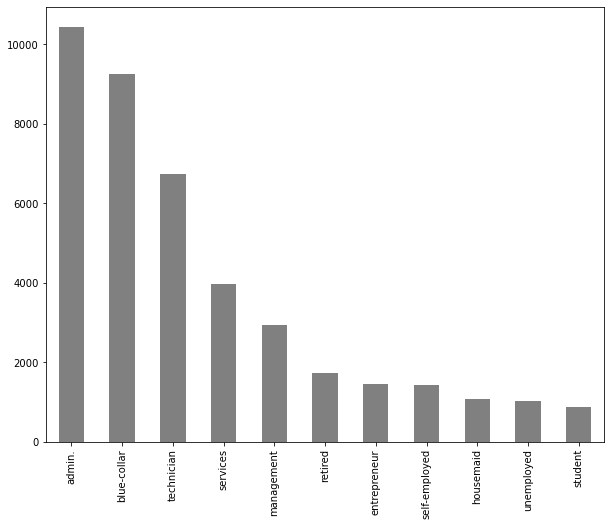

In [20]:
plt.figure(figsize=(10, 8))
df['job'].value_counts().plot(kind='bar', color='grey')
print(df['job'].value_counts())

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
Name: y, dtype: int64


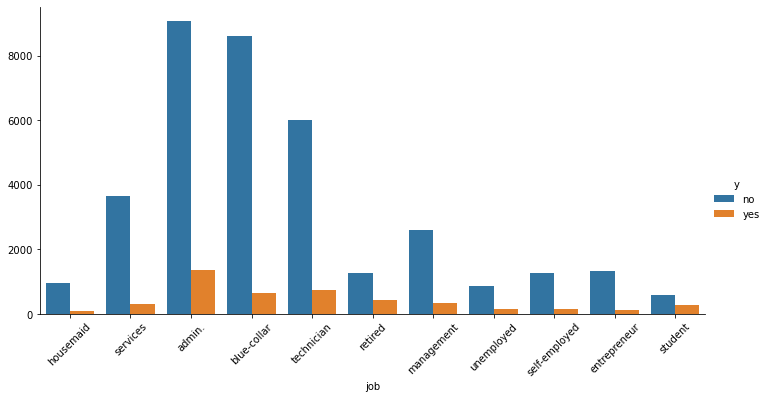

In [21]:
print(df.groupby('job')['y'].value_counts())

sns.catplot(x='job',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Marital Status

In [22]:
df['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [23]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64


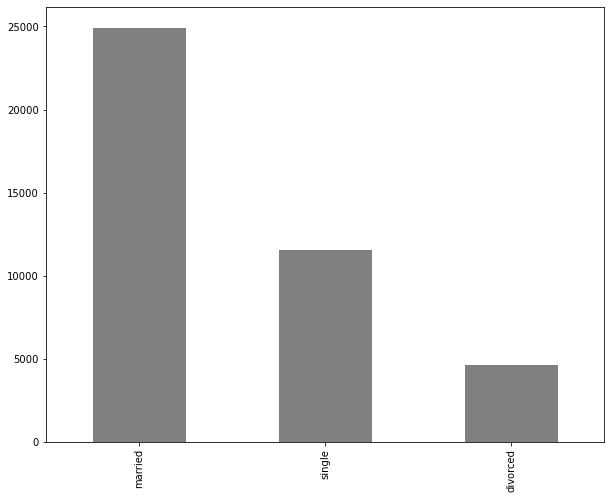

In [24]:
plt.figure(figsize=(10, 8))

df['marital'].value_counts().plot(kind='bar', color='grey')
print(df['marital'].value_counts())

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
Name: y, dtype: int64


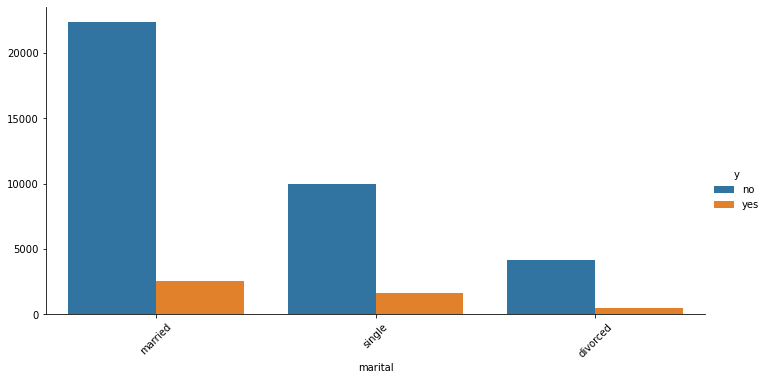

In [25]:
print(df.groupby('marital')['y'].value_counts())

sns.catplot(x='marital',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Education

In [26]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [27]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64


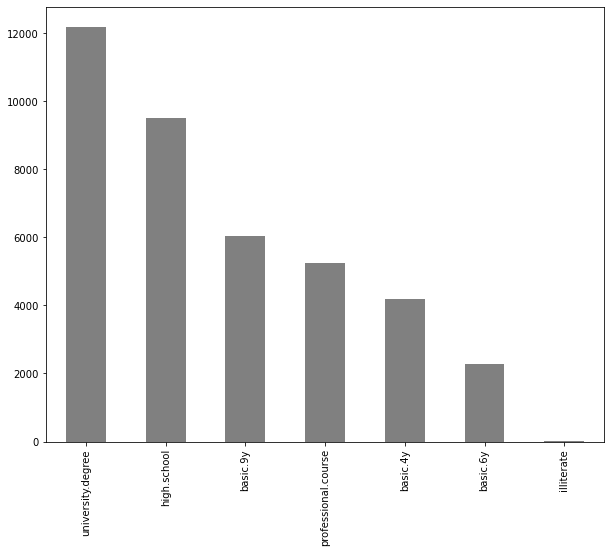

In [28]:
plt.figure(figsize=(10, 8))

df['education'].value_counts().plot(kind='bar', color='grey')
print(df['education'].value_counts())

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
Name: y, dtype: int64


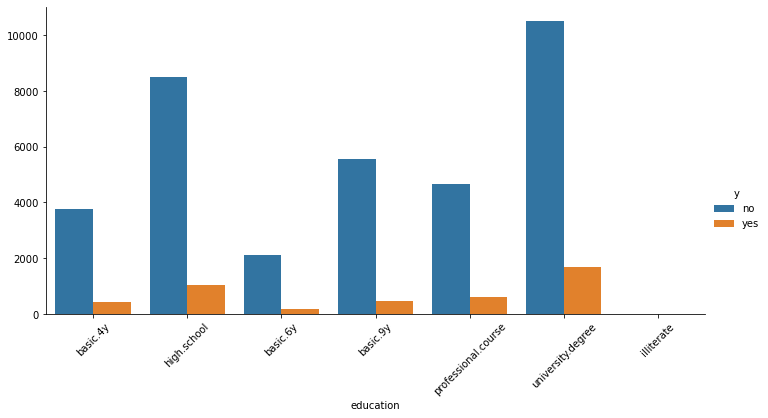

In [29]:
print(df.groupby('education')['y'].value_counts())

sns.catplot(x='education',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Has credit in default ?

In [30]:
df['default'].unique()

array(['no', nan, 'yes'], dtype=object)

In [31]:
df['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

no     32588
yes        3
Name: default, dtype: int64


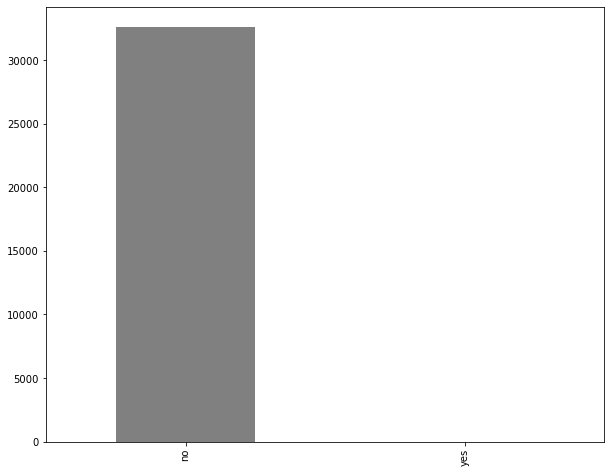

In [32]:
plt.figure(figsize=(10, 8))

df['default'].value_counts().plot(kind='bar', color='grey')
print(df['default'].value_counts())

default  y  
no       no     28391
         yes     4197
yes      no         3
Name: y, dtype: int64


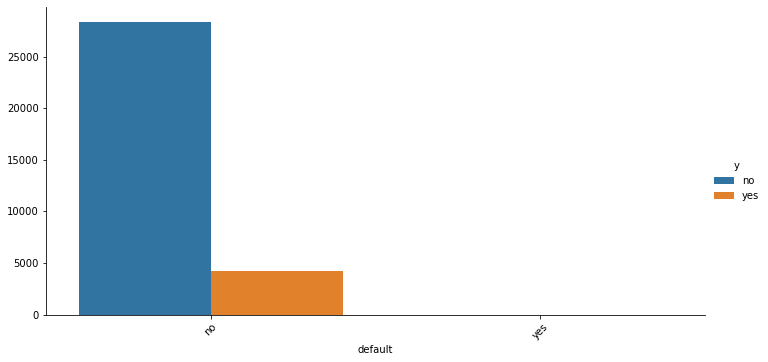

In [33]:
print(df.groupby('default')['y'].value_counts())

sns.catplot(x='default',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Has Housing Loan?

In [34]:
df['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [35]:
df['housing'].value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

yes    21576
no     18622
Name: housing, dtype: int64


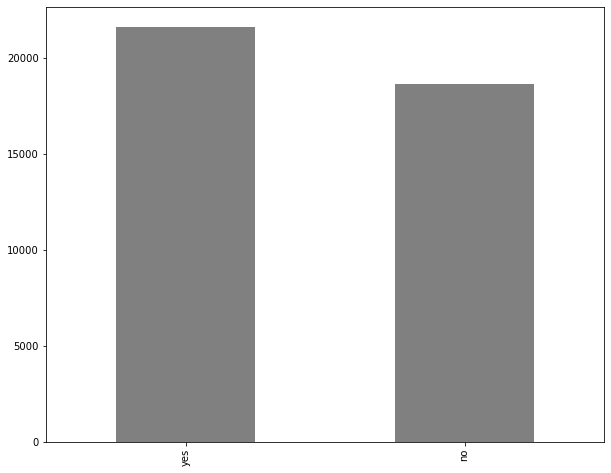

In [36]:
plt.figure(figsize=(10, 8))

df['housing'].value_counts().plot(kind='bar', color='grey')
print(df['housing'].value_counts())

housing  y  
no       no     16596
         yes     2026
yes      no     19069
         yes     2507
Name: y, dtype: int64


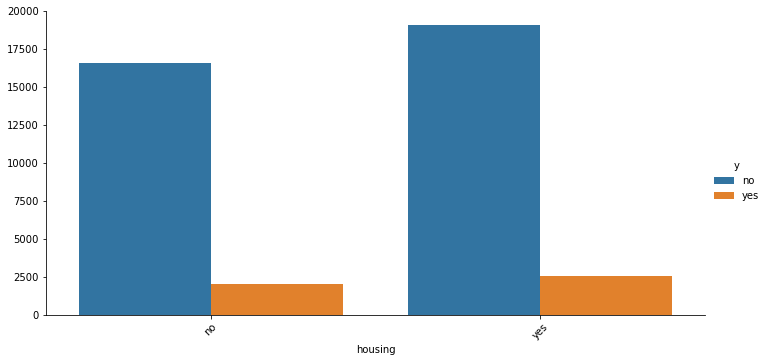

In [37]:
print(df.groupby('housing')['y'].value_counts())

sns.catplot(x='housing',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Has personal loan?

In [38]:
df['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [39]:
df['loan'].value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

no     33950
yes     6248
Name: loan, dtype: int64


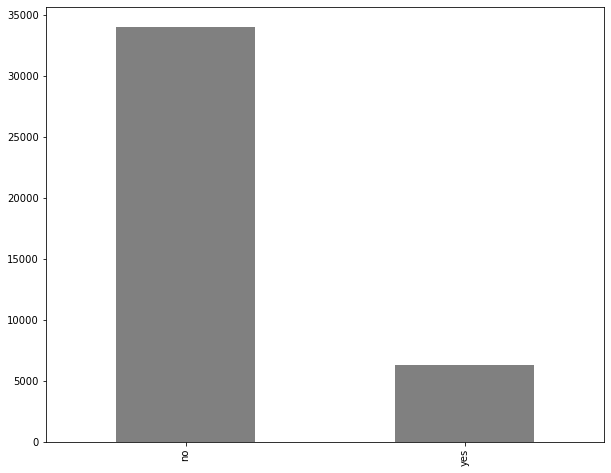

In [40]:
plt.figure(figsize=(10, 8))

df['loan'].value_counts().plot(kind='bar', color='grey')
print(df['loan'].value_counts())

loan  y  
no    no     30100
      yes     3850
yes   no      5565
      yes      683
Name: y, dtype: int64


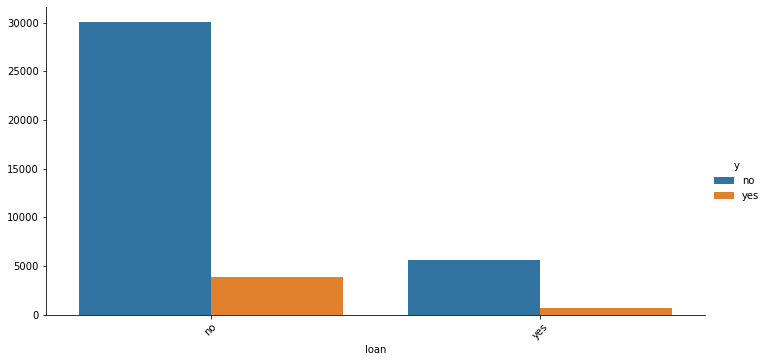

In [41]:
print(df.groupby('loan')['y'].value_counts())

sns.catplot(x='loan',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

## Related with the last contact of the current campaign

#### Contact Communication Type

In [42]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [43]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

cellular     26144
telephone    15044
Name: contact, dtype: int64


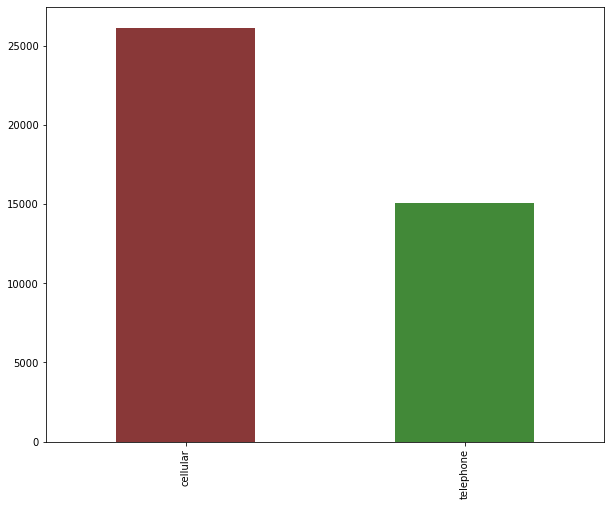

In [44]:
plt.figure(figsize=(10, 8))

df['contact'].value_counts().plot(kind='bar', color={'#428938', '#893838'})
print(df['contact'].value_counts())

contact    y  
cellular   no     22291
           yes     3853
telephone  no     14257
           yes      787
Name: y, dtype: int64


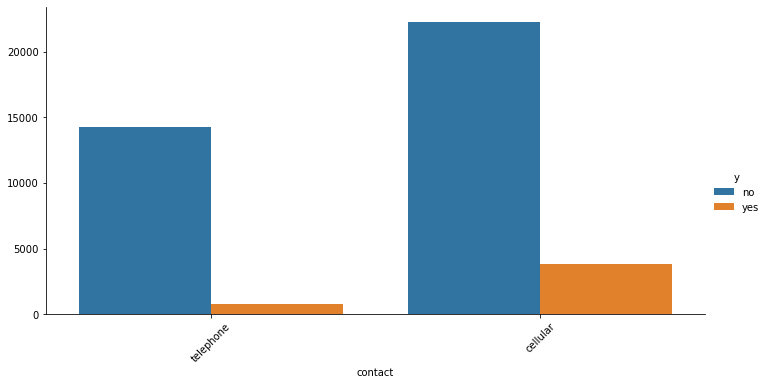

In [45]:
print(df.groupby('contact')['y'].value_counts())

sns.catplot(x='contact',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Last contact month of year

In [46]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [47]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


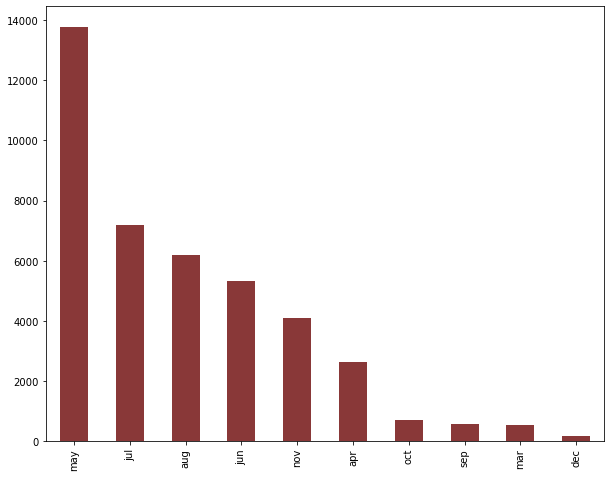

In [48]:
plt.figure(figsize=(10, 8))

df['month'].value_counts().plot(kind='bar', color='#893838')
print(df['month'].value_counts())

month  y  
apr    no      2093
       yes      539
aug    no      5523
       yes      655
dec    no        93
       yes       89
jul    no      6525
       yes      649
jun    no      4759
       yes      559
mar    yes      276
       no       270
may    no     12883
       yes      886
nov    no      3685
       yes      416
oct    no       403
       yes      315
sep    no       314
       yes      256
Name: y, dtype: int64


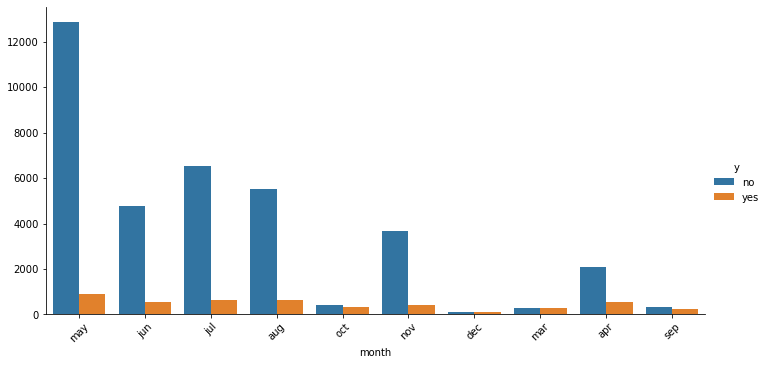

In [49]:
print(df.groupby('month')['y'].value_counts())

sns.catplot(x='month',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Last contact day of the week

In [50]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [51]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


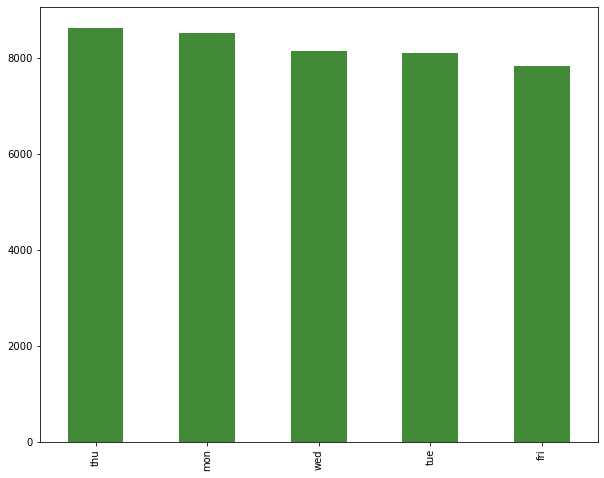

In [52]:
plt.figure(figsize=(10, 8))

df['day_of_week'].value_counts().plot(kind='bar', color='#428938')
print(df['day_of_week'].value_counts())

day_of_week  y  
fri          no     6981
             yes     846
mon          no     7667
             yes     847
thu          no     7578
             yes    1045
tue          no     7137
             yes     953
wed          no     7185
             yes     949
Name: y, dtype: int64


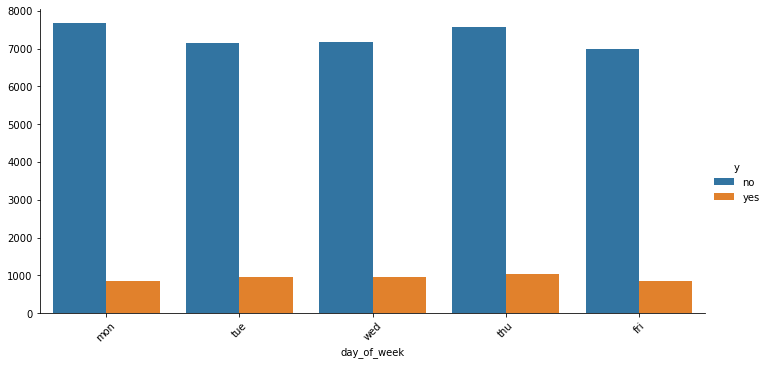

In [53]:
print(df.groupby('day_of_week')['y'].value_counts())

sns.catplot(x='day_of_week',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

#### Last contact duration

In [54]:
df['duration'].min()

0

In [55]:
df['duration'].max()

4918

## Other Attributes

#### Number of contacts performed during this campaign

The maximum number of contacts performed during campaign:  56 with occurences of  1
The minimum number of contacts performed during campaign:  1 with occurences of  17642


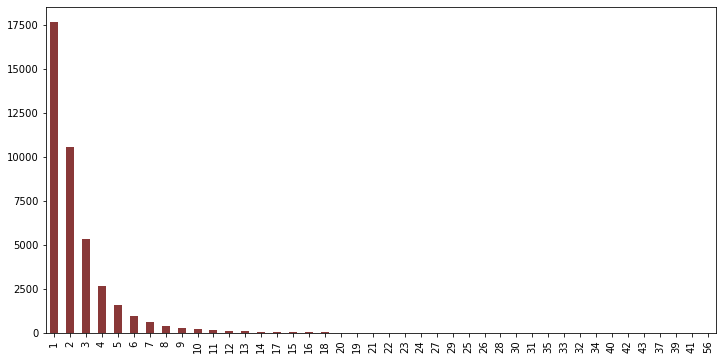

In [56]:
print('The maximum number of contacts performed during campaign: ',  df['campaign'].max(), 'with occurences of ', df['campaign'].value_counts().min())
print('The minimum number of contacts performed during campaign: ',  df['campaign'].min(), 'with occurences of ', df['campaign'].value_counts().max())

plt.figure(figsize=(12,6))
df['campaign'].value_counts().plot(kind='bar',  color='#893838')

#### Pdays

##### Number of days that passed by after the client was last contacted from a previous campaign

In [57]:
print(" '999' means client was not previously contacted")

df['pdays'].value_counts()

 '999' means client was not previously contacted


999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

#### Previous

##### Number of contacts performed before this campaign and for this client

In [58]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Most of the clients were not contacted before the campaign


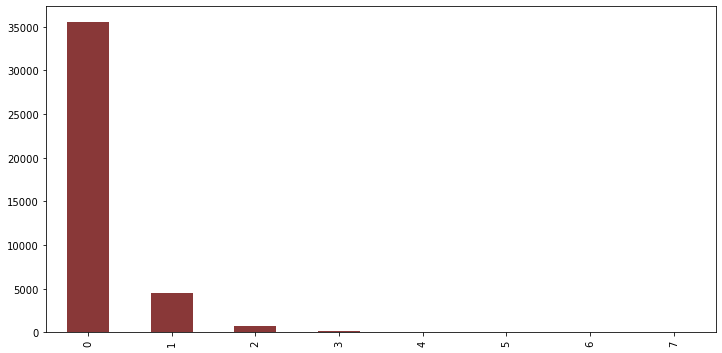

In [59]:
print('Most of the clients were not contacted before the campaign')

plt.figure(figsize=(12,6))
df['previous'].value_counts().plot(kind='bar',  color='#893838')
plt.show()

#### Poutcome

##### Outcome of the previous marketing campaign

In [60]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [61]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      yes      894
             no       479
Name: y, dtype: int64


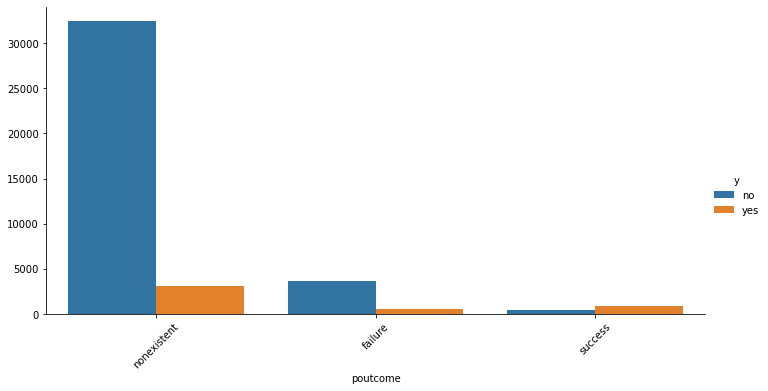

In [62]:
print(df.groupby('poutcome')['y'].value_counts())

sns.catplot(x='poutcome',kind='count', hue='y', data=df, height=5, aspect=2)
plt.ylabel('')
plt.xticks(rotation=45)
plt.show()

## Social and economic context attributes

#### Employment variation rate - - quarterly indicator

In [63]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

#### Consumer price index - monthly indicator

##### consumer price index - monthly indicator 

In [64]:
print('Maximum price: ', df['cons.price.idx'].max())
print('Minimum price: ', df['cons.price.idx'].min())

Maximum price:  94.76700000000001
Minimum price:  92.20100000000001


#### Consumer conf index - monthly indicator

##### consumer confidence index - monthly indicator 

In [65]:
print('Maximum price: ', df['cons.conf.idx'].max())
print('Minimum price: ', df['cons.conf.idx'].min())

Maximum price:  -26.9
Minimum price:  -50.8


#### Euribor3m: 
##### euribor 3 month rate - daily indicator 

In [66]:
print('Maximum rate: ', df['euribor3m'].max())
print('Minimum rate: ', df['euribor3m'].min())

Maximum rate:  5.045
Minimum rate:  0.634


#### nr.employed
##### Number of employees - quarterly indicator

In [67]:
df['nr.employed']

0        5191.0
1        5191.0
2        5191.0
3        5191.0
4        5191.0
          ...  
41183    4963.6
41184    4963.6
41185    4963.6
41186    4963.6
41187    4963.6
Name: nr.employed, Length: 41188, dtype: float64

In [68]:
print('Maximum no. of Employees: ', df['nr.employed'].max())
print('Minimum no. of Employees: ', df['nr.employed'].min())

Maximum no. of Employees:  5228.1
Minimum no. of Employees:  4963.6


## Filling unknown values with possible class labels

In [69]:
combine_train_test_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [70]:
combine_train_test_df.isnull().sum()

age                  0
job                369
marital             91
education         1898
default           9400
housing           1095
loan              1095
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [71]:
combine_train_test_df['job'].value_counts()

admin.           11434
blue-collar      10138
technician        7434
services          4362
management        3248
retired           1886
entrepreneur      1604
self-employed     1580
housemaid         1170
unemployed        1125
student            957
Name: job, dtype: int64

#### Job Status

In [72]:
# fill in null values in the job status with admin jobs(highest occurence)
combine_train_test_df['job'] = combine_train_test_df['job'].fillna('admin.')
print(combine_train_test_df['job'])

0        housemaid
1         services
2         services
3           admin.
4         services
           ...    
4114        admin.
4115        admin.
4116       student
4117        admin.
4118    management
Name: job, Length: 45307, dtype: object


In [73]:
combine_train_test_df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

#### Marital Status

In [74]:
combine_train_test_df['marital'].value_counts()

married     27437
single      12721
divorced     5058
Name: marital, dtype: int64

In [75]:
# fill in null values in marital status with married(highest occurence)
combine_train_test_df['marital'] = combine_train_test_df['marital'].fillna('married')
print(combine_train_test_df['marital'])

0       married
1       married
2       married
3       married
4       married
         ...   
4114    married
4115    married
4116     single
4117    married
4118     single
Name: marital, Length: 45307, dtype: object


In [76]:
combine_train_test_df['marital'].value_counts()

married     27528
single      12721
divorced     5058
Name: marital, dtype: int64

#### Educational Level

In [77]:
combine_train_test_df['education'].value_counts()

university.degree      13432
high.school            10436
basic.9y                6619
professional.course     5778
basic.4y                4605
basic.6y                2520
illiterate                19
Name: education, dtype: int64

In [78]:
# fill in null values in education status with married(highest occurence)
combine_train_test_df['education'] = combine_train_test_df['education'].fillna('university.degree')
print(combine_train_test_df['education'])

0          basic.4y
1       high.school
2       high.school
3          basic.6y
4       high.school
           ...     
4114       basic.6y
4115    high.school
4116    high.school
4117    high.school
4118    high.school
Name: education, Length: 45307, dtype: object


In [79]:
combine_train_test_df['education'].value_counts()

university.degree      15330
high.school            10436
basic.9y                6619
professional.course     5778
basic.4y                4605
basic.6y                2520
illiterate                19
Name: education, dtype: int64

#### Default

In [80]:
combine_train_test_df['default'].value_counts()

no     35903
yes        4
Name: default, dtype: int64

In [81]:
# fill in null values in default status with no(highest occurence)
combine_train_test_df['default'] = combine_train_test_df['default'].fillna('no')
print(combine_train_test_df['default'])

0       no
1       no
2       no
3       no
4       no
        ..
4114    no
4115    no
4116    no
4117    no
4118    no
Name: default, Length: 45307, dtype: object


In [82]:
combine_train_test_df['default'].value_counts()

no     45303
yes        4
Name: default, dtype: int64

#### Housing

In [83]:
combine_train_test_df['housing'].value_counts()

yes    23751
no     20461
Name: housing, dtype: int64

In [84]:
# Filling the null values randomly with 50-50% as the values seem evenly share

mask = combine_train_test_df['housing'].isna()
ind = combine_train_test_df['housing'].loc[mask].sample(frac=0.5).index
df.loc[ind, 'housing'] = 'yes'
combine_train_test_df['housing'] = combine_train_test_df['housing'].fillna('no')

c:\users\co\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [85]:
combine_train_test_df['housing'].value_counts()

yes    24273
no     21034
Name: housing, dtype: int64

#### Loan status

In [86]:
combine_train_test_df['loan'].value_counts()

no     37299
yes     6913
Name: loan, dtype: int64

In [87]:
# fill in null values in loan status with no (highest occurence)
combine_train_test_df['loan'] = combine_train_test_df['loan'].fillna('no')
print(combine_train_test_df['loan'])

0        no
1        no
2        no
3        no
4       yes
       ... 
4114    yes
4115     no
4116     no
4117     no
4118     no
Name: loan, Length: 45307, dtype: object


In [88]:
combine_train_test_df['loan'].value_counts()

no     38394
yes     6913
Name: loan, dtype: int64

#### Pdays

In [89]:
combine_train_test_df['pdays'].value_counts()

999    43632
3        491
6        454
4        132
7         70
9         67
2         65
12        63
10        60
5         50
13        38
1         29
11        29
15        26
14        21
8         18
0         17
16        13
17         9
18         9
19         4
21         3
22         3
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [90]:
# 999 means client was not previously contacted, 
# So we replace '999' with '0'

combine_train_test_df['pdays'].replace(999, 0, inplace=True)

In [91]:
combine_train_test_df['pdays'].value_counts()

0     43649
3       491
6       454
4       132
7        70
9        67
2        65
12       63
10       60
5        50
13       38
1        29
11       29
15       26
14       21
8        18
16       13
17        9
18        9
19        4
21        3
22        3
20        1
25        1
26        1
27        1
Name: pdays, dtype: int64

In [92]:
combine_train_test_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,0,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,0,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,0,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [93]:
combine_train_test_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Classification and Accuracy

### Categorical Encoding

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
combine_train_test_df['job']=le.fit_transform(combine_train_test_df['job'])
combine_train_test_df['marital']=le.fit_transform(combine_train_test_df['marital'])
combine_train_test_df['education']=le.fit_transform(combine_train_test_df['education'])
combine_train_test_df['default']=le.fit_transform(combine_train_test_df['default'])
combine_train_test_df['housing']=le.fit_transform(combine_train_test_df['housing'])
combine_train_test_df['loan']=le.fit_transform(combine_train_test_df['loan'])
combine_train_test_df['contact']=le.fit_transform(combine_train_test_df['contact'])
combine_train_test_df['month']=le.fit_transform(combine_train_test_df['month'])
combine_train_test_df['day_of_week']=le.fit_transform(combine_train_test_df['day_of_week'])
combine_train_test_df['poutcome']=le.fit_transform(combine_train_test_df['poutcome'])
combine_train_test_df['y']=le.fit_transform(combine_train_test_df['y'])

In [95]:
combine_train_test_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,1,1,0,3,2,...,1,0,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,1,0,1,3,0,...,1,0,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,...,2,0,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,...,1,0,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [96]:
# this attribute highly affects the output target (e.g., if duration=0 then y="no"). 
# Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and should be discarded 
#     if the intention is to have a realistic predictive model.

combine_train_test_df.drop(columns = ['duration'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,0,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,1,1,0,3,2,1,0,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,1,0,1,3,0,1,0,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,2,0,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,1,0,0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [97]:
combine_train_test_df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [98]:
combine_train_test_df.iloc[:, :20]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,0,1,6,1,149,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,1,0,1,6,1,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,1,1,6,1,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,1,1,0,3,2,53,1,0,0,1,1.4,93.918,-42.7,4.958,5228.1
4115,39,0,1,3,0,1,0,1,3,0,219,1,0,0,1,1.4,93.918,-42.7,4.959,5228.1
4116,27,8,2,3,0,0,0,0,6,1,64,2,0,1,0,-1.8,92.893,-46.2,1.354,5099.1
4117,58,0,1,3,0,0,0,0,1,0,528,1,0,0,1,1.4,93.444,-36.1,4.966,5228.1


In [99]:
# Group the model into training and test dataset for classification.

X_train = combine_train_test_df.iloc[:41188, :20].values

y_train = combine_train_test_df.iloc[:41188, 20].values

X_test = combine_train_test_df.iloc[41188:, :20].values

y_test = combine_train_test_df.iloc[41188:, 20].values


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(41188, 20) (41188,) (4119, 20) (4119,)


In [100]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled

array([[ 1.53303429, -0.17929992, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.5110194 , -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

#### Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(X_train, y_train)
# Measure the accuracy
clf.score(X_test, y_test)

0.9995144452537024

#### SVM

In [102]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='poly', C=C)

# Train the classifier on the training set
svc.fit(X_train, y_train)
# Measure the accuracy
print(svc.score(X_test, y_test))

0.8994901675163874


#### KNN

In [142]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)

# Train the classifier on the training set
clf.fit(X_train, y_train)
# Measure the accuracy
clf.score(X_test, y_test)

0.9186695799951444

#### Logistic Regression

### K-Fold Validation Test

#### Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10).

In [153]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, combine_train_test_df.iloc[:, :20].values, combine_train_test_df.iloc[:, 20].values, cv=10)

print(cv_scores)
print(cv_scores.mean())

[0.90178768 0.88722136 0.85853013 0.84109468 0.87133083 0.87088943
 0.70889428 0.81633554 0.5781457  0.94392936]
0.827815899593821


In [154]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, combine_train_test_df.iloc[:, :20].values, combine_train_test_df.iloc[:, 20].values, cv=10)

print(cv_scores)
cv_scores.mean()

[0.90002207 0.89516663 0.88082101 0.8669168  0.88810417 0.88832487
 0.86073714 0.87770419 0.52626932 0.87682119]


0.846088739675612

In [156]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, combine_train_test_df.iloc[:, :20].values, combine_train_test_df.iloc[:, 20].values, cv=10)

print(cv_scores)
print(cv_scores.mean())


[0.89693224 0.89384242 0.89560803 0.89384242 0.88942838 0.88766277
 0.88611785 0.88741722 0.90860927 0.89624724]
0.8935707851187529


#### The SVM model is best suited for amongst the other machine learning algorithm. Others seems to be overfitting. Hence, SVM model is chosen